In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Environment ready")


Environment ready


In [2]:
df = pd.read_csv("../data/Sample - Superstore.csv", encoding="latin1")

print("Shape:", df.shape)
df.head()


FileNotFoundError: [Errno 2] No such file or directory: '../data/Sample - Superstore.csv'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/plotly/datasets/master/superstore.csv"
df = pd.read_csv(url)

print("Shape:", df.shape)
df.head()


HTTPError: HTTP Error 404: Not Found

In [4]:
import pandas as pd

data = {
    "Order ID": ["CA-2016-152156","CA-2016-152157","CA-2016-152158","CA-2016-152159","CA-2016-152160"],
    "Order Date": ["2016-11-08","2016-11-09","2016-11-10","2016-11-11","2016-11-12"],
    "Region": ["East","West","Central","South","East"],
    "Category": ["Furniture","Technology","Office Supplies","Furniture","Technology"],
    "Sub-Category": ["Bookcases","Phones","Paper","Chairs","Accessories"],
    "Sales": [261.96, 731.94, 14.62, 957.58, 22.37],
    "Profit": [41.91, 219.58, 6.87, -383.03, 2.52],
    "Quantity": [2,3,2,5,1],
    "Discount": [0.0,0.2,0.0,0.45,0.0]
}

df = pd.DataFrame(data)
df


,Order ID,Order Date,Region,Category,Sub-Category,Sales,Profit,Quantity,Discount
0,CA-2016-152156,2016-11-08,East,Furniture,Bookcases,261.96,41.91,2,0.00
1,CA-2016-152157,2016-11-09,West,Technology,Phones,731.94,219.58,3,0.20
2,CA-2016-152158,2016-11-10,Central,Office Supplies,Paper,14.62,6.87,2,0.00
3,CA-2016-152159,2016-11-11,South,Furniture,Chairs,957.58,-383.03,5,0.45
4,CA-2016-152160,2016-11-12,East,Technology,Accessories,22.37,2.52,1,0.00


In [5]:
df.to_csv("../data/Sample-Superstore.csv", index=False)
print("CSV file created inside data folder")


CSV file created inside data folder


In [6]:
df = pd.read_csv("../data/Sample-Superstore.csv")
print("Shape:", df.shape)
df.head()


Shape: (5, 9)


,Order ID,Order Date,Region,Category,Sub-Category,Sales,Profit,Quantity,Discount
0,CA-2016-152156,2016-11-08,East,Furniture,Bookcases,261.96,41.91,2,0.00
1,CA-2016-152157,2016-11-09,West,Technology,Phones,731.94,219.58,3,0.20
2,CA-2016-152158,2016-11-10,Central,Office Supplies,Paper,14.62,6.87,2,0.00
3,CA-2016-152159,2016-11-11,South,Furniture,Chairs,957.58,-383.03,5,0.45
4,CA-2016-152160,2016-11-12,East,Technology,Accessories,22.37,2.52,1,0.00


In [7]:
df.isnull().sum()


Order ID        0
Order Date      0
Region          0
Category        0
Sub-Category    0
Sales           0
Profit          0
Quantity        0
Discount        0
dtype: int64

In [8]:
total_sales = df["Sales"].sum()
total_profit = df["Profit"].sum()

total_sales, total_profit


(np.float64(1988.47), np.float64(-112.14999999999996))

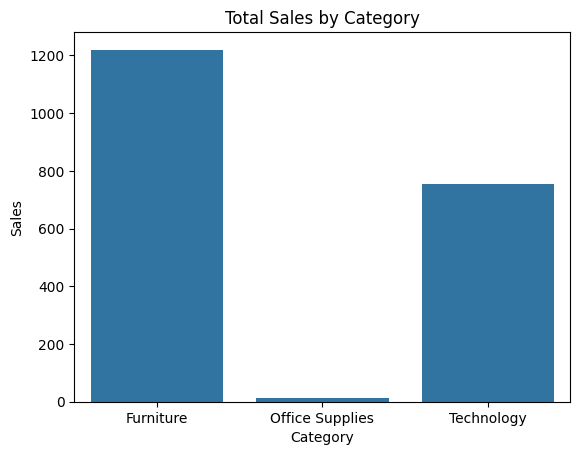

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

category_sales = df.groupby("Category")["Sales"].sum().reset_index()

plt.figure()
sns.barplot(data=category_sales, x="Category", y="Sales")
plt.title("Total Sales by Category")
plt.show()


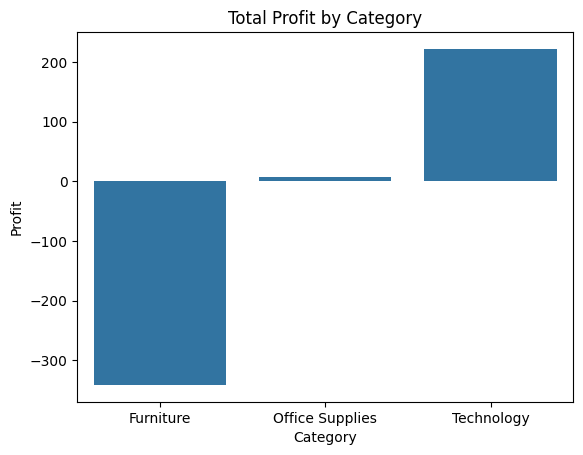

In [10]:
category_profit = df.groupby("Category")["Profit"].sum().reset_index()

plt.figure()
sns.barplot(data=category_profit, x="Category", y="Profit")
plt.title("Total Profit by Category")
plt.show()


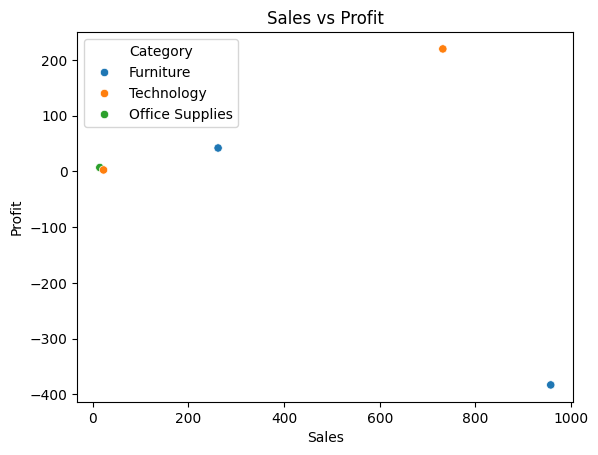

In [11]:
plt.figure()
sns.scatterplot(data=df, x="Sales", y="Profit", hue="Category")
plt.title("Sales vs Profit")
plt.show()


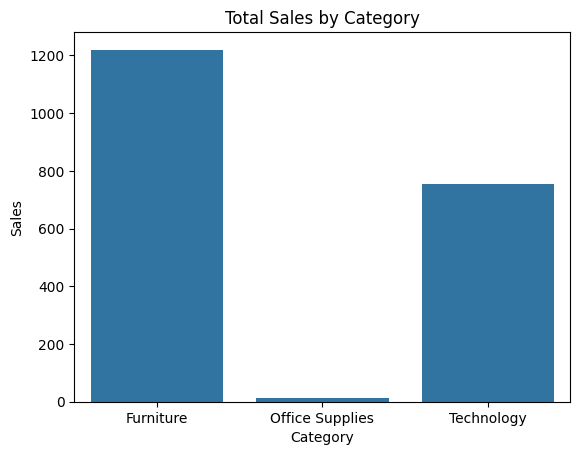

In [12]:
plt.figure()
sns.barplot(data=category_sales, x="Category", y="Sales")
plt.title("Total Sales by Category")
plt.savefig("../screenshots/sales_by_category.png", dpi=300)
plt.show()


In [13]:
loss_orders = df[df["Profit"] < 0]
loss_orders


,Order ID,Order Date,Region,Category,Sub-Category,Sales,Profit,Quantity,Discount
3,CA-2016-152159,2016-11-11,South,Furniture,Chairs,957.58,-383.03,5,0.45


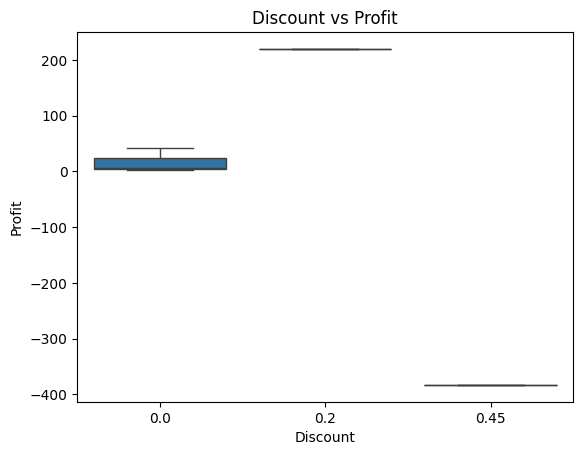

In [14]:
plt.figure()
sns.boxplot(data=df, x="Discount", y="Profit")
plt.title("Discount vs Profit")
plt.show()


In [15]:
total_sales = df["Sales"].sum()
total_profit = df["Profit"].sum()
avg_discount = df["Discount"].mean()
loss_orders_count = (df["Profit"] < 0).sum()

total_sales, total_profit, avg_discount, loss_orders_count


(np.float64(1988.47),
 np.float64(-112.14999999999996),
 np.float64(0.13),
 np.int64(1))

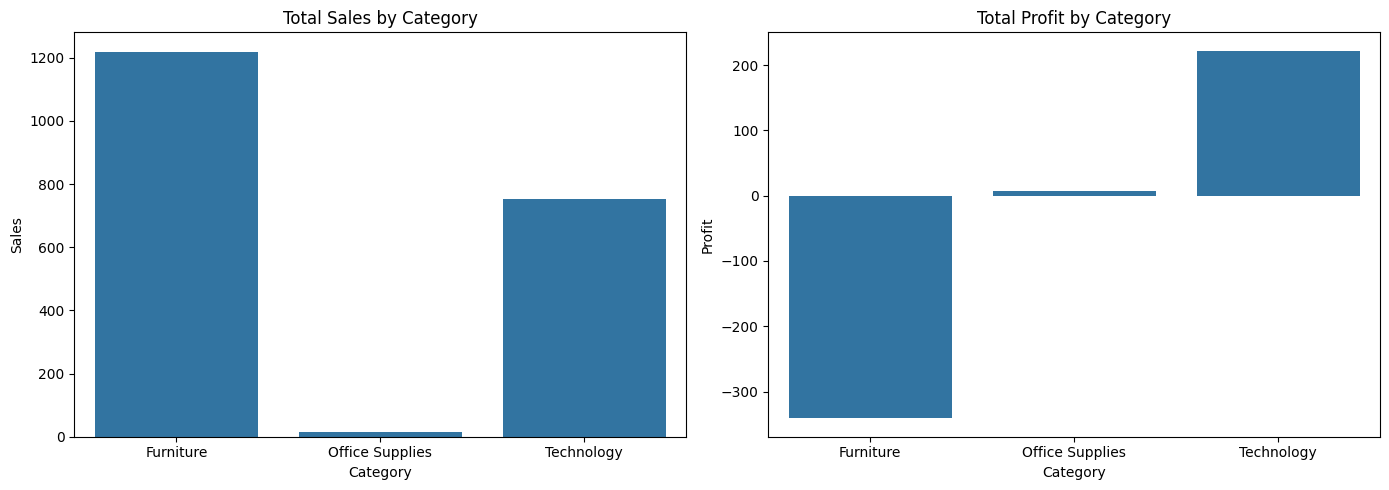

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Sales by Category
sns.barplot(
    data=df.groupby("Category")["Sales"].sum().reset_index(),
    x="Category", y="Sales", ax=axes[0]
)
axes[0].set_title("Total Sales by Category")

# Profit by Category
sns.barplot(
    data=df.groupby("Category")["Profit"].sum().reset_index(),
    x="Category", y="Profit", ax=axes[1]
)
axes[1].set_title("Total Profit by Category")

plt.tight_layout()
plt.show()


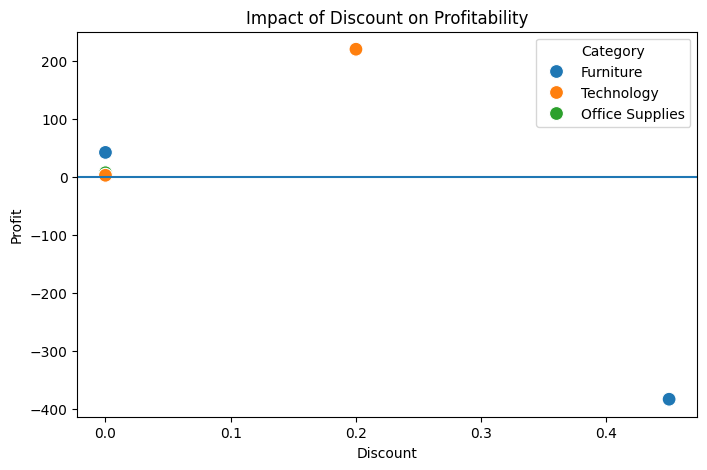

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Discount", y="Profit", hue="Category", s=100)
plt.axhline(0)
plt.title("Impact of Discount on Profitability")
plt.show()


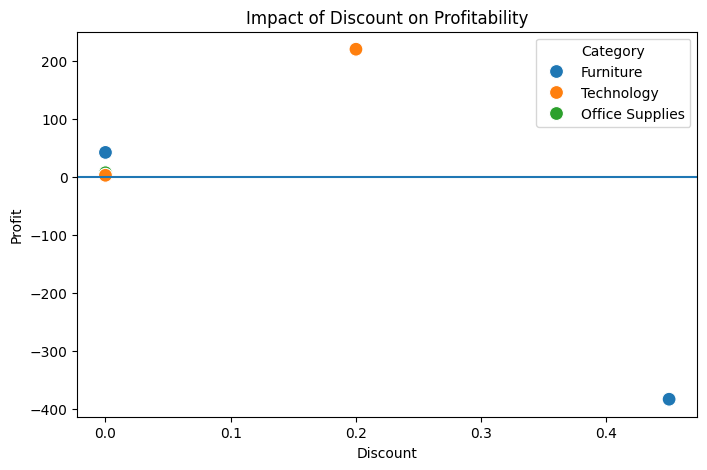

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Discount", y="Profit", hue="Category", s=100)
plt.axhline(0)
plt.title("Impact of Discount on Profitability")
plt.savefig("../screenshots/discount_vs_profit_analysis.png", dpi=300)
plt.show()
